In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('../data/only_crimes_.csv')

C:\Users\kenic\AppData\Local\Temp\ipykernel_13000\1915786457.py:6: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/only_crimes_.csv')


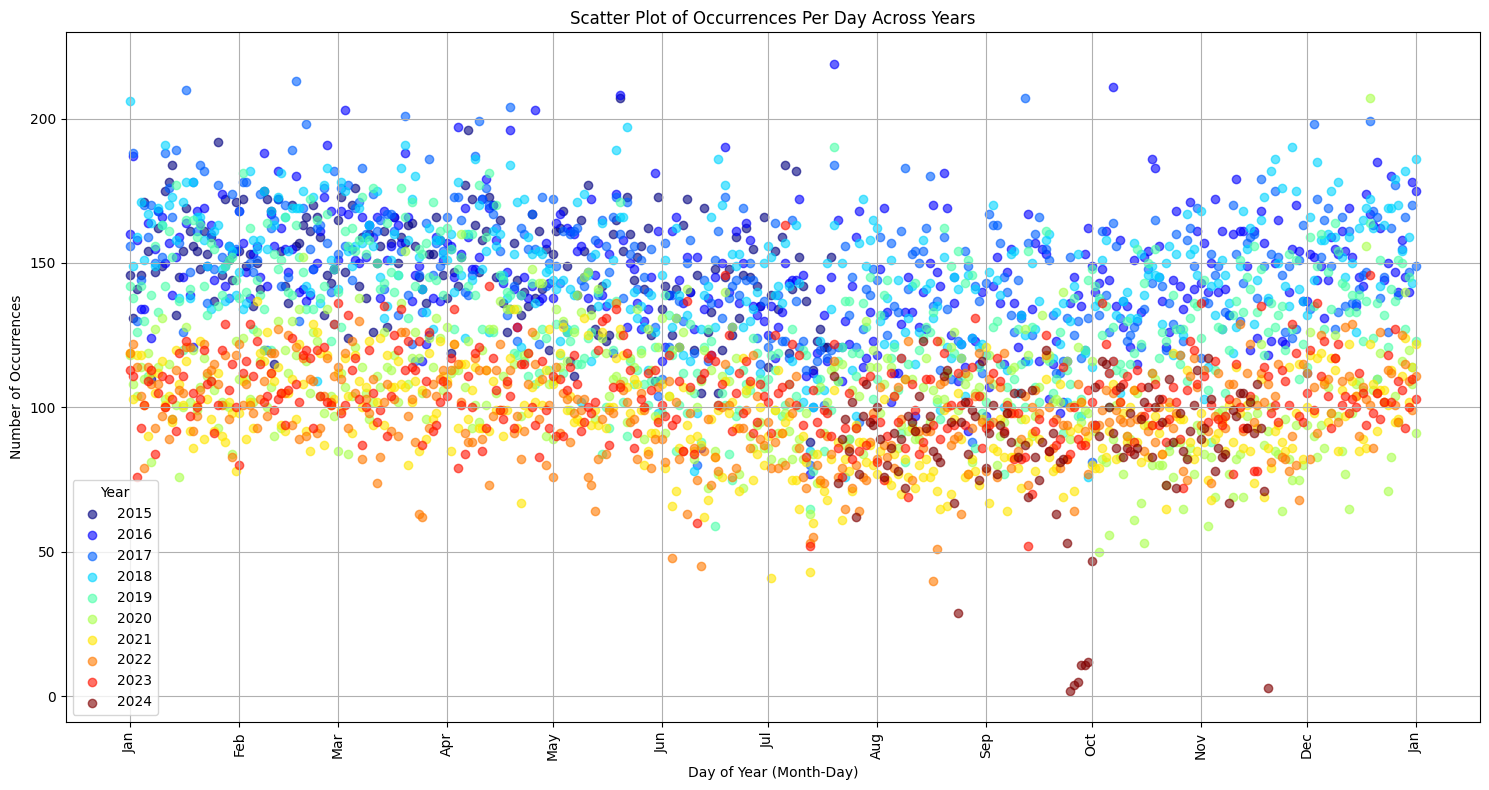

In [2]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['day_of_year'] = df['OCCURRED_ON_DATE'].dt.strftime('%m-%d')

grouped = df.groupby(['YEAR', 'day_of_year']).size().reset_index(name='count')
grouped.to_csv('../data/monthly_trends.csv', index=False)

plt.figure(figsize=(15, 8))
colors = plt.cm.jet(np.linspace(0, 1, len(grouped['YEAR'].unique())))
for (year, group), color in zip(grouped.groupby('YEAR'), colors):
    plt.scatter(group['day_of_year'], group['count'], color=color, label=year, alpha=0.6)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


plt.title('Scatter Plot of Occurrences Per Day Across Years')
plt.xlabel('Day of Year (Month-Day)')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.legend(title='Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    YEAR DAY_OF_WEEK  total_cases  day_count
0   2016      Friday         8058         53
1   2016      Monday         7713         52
2   2016    Saturday         7754         53
3   2016      Sunday         7240         52
4   2016    Thursday         7655         52
5   2016     Tuesday         7626         52
6   2016   Wednesday         7673         52
7   2017      Friday         8035         52
8   2017      Monday         7526         52
9   2017    Saturday         7783         52
10  2017      Sunday         7482         53
11  2017    Thursday         7611         52
12  2017     Tuesday         7714         52
13  2017   Wednesday         7797         52
14  2018      Friday         7866         52
15  2018      Monday         7613         53
16  2018    Saturday         7859         52
17  2018      Sunday         7123         52
18  2018    Thursday         7646         52
19  2018     Tuesday         7488         52
20  2018   Wednesday         7616         52
21  2019  

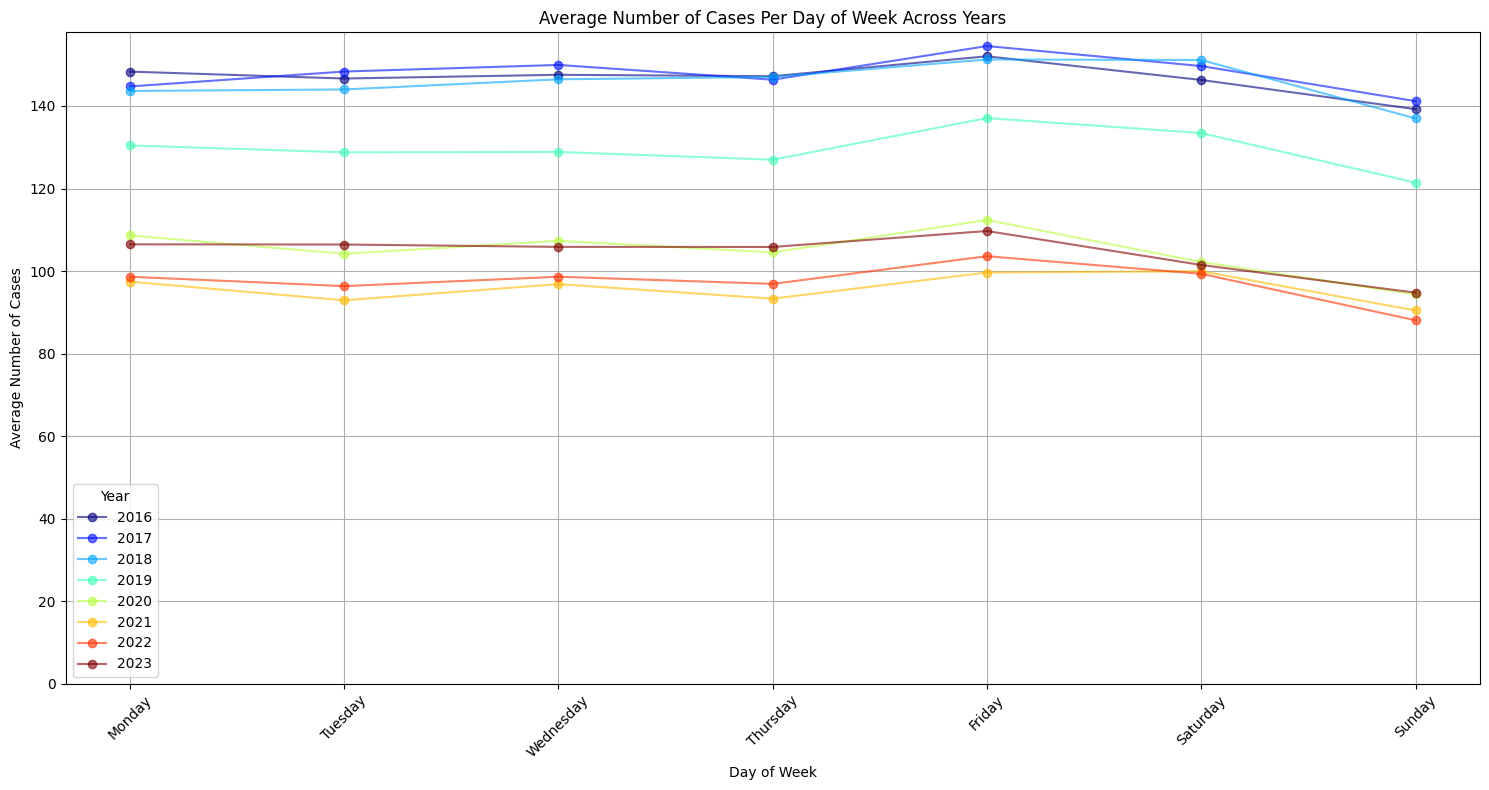

In [5]:
df_filtered = df[(df['YEAR'] != 2024) & (df['YEAR'] != 2015)]

grouped_sum = df_filtered.groupby(['YEAR', 'DAY_OF_WEEK']).size().reset_index(name='total_cases')

# Generate a date range for each year and count each day of the week
years = df_filtered['YEAR'].unique()
day_counts = []
for year in years:
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)
    dates = pd.date_range(start=start_date, end=end_date)
    days = dates.day_name()
    day_count = days.value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    for day, count in day_count.items():
        day_counts.append({'YEAR': year, 'DAY_OF_WEEK': day, 'day_count': count})

# Create DataFrame
df_day_counts = pd.DataFrame(day_counts)

#print(df_day_counts)

# Merge sum and day count dataframes
merged_data = pd.merge(grouped_sum, df_day_counts, on=['YEAR', 'DAY_OF_WEEK'])

print(merged_data)

# Calculate average
merged_data['average_cases'] = merged_data['total_cases'] / merged_data['day_count']

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_data['DAY_OF_WEEK'] = pd.Categorical(merged_data['DAY_OF_WEEK'], categories=days_order, ordered=True)
merged_data = merged_data.sort_values(['YEAR', 'DAY_OF_WEEK'])

merged_data.to_csv("../data/weekly_trends.csv", index=False)


plt.figure(figsize=(15, 8))
colors = plt.cm.jet(np.linspace(0, 1, len(merged_data['YEAR']. unique())))
for (year, group), color in zip(merged_data.groupby('YEAR'), colors):
    plt.plot(group['DAY_OF_WEEK'], group['average_cases'], marker='o', color=color, label=year, alpha=0.6)

plt.title('Average Number of Cases Per Day of Week Across Years')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Cases')
plt.grid(True)
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0)
plt.show()